### Deliverable 3: Optimization

Design a neural network model, taking into account any modifications
that will optimize the model to achieve higher than 75% accuracy.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
applType_count=application_df.APPLICATION_TYPE.value_counts()
applType_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

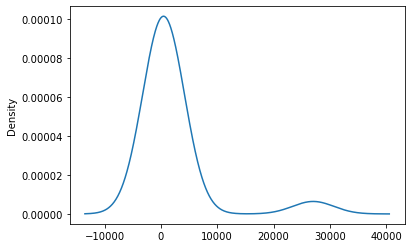

In [5]:
# Visualize the value counts of APPLICATION_TYPE
applType_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(applType_count[applType_count < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classific_count=application_df.CLASSIFICATION.value_counts()
classific_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C2561        1
C6100        1
C2500        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

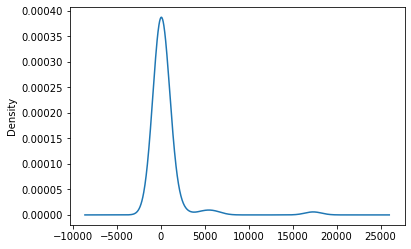

In [8]:
# Visualize the value counts of CLASSIFICATION
classific_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classific_count[classific_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)



In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### 1st trial

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="linear")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="linear"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Epoch 1/100
804/804 [==============================] - 1s 748us/step - loss: 3.5779 - accuracy: 0.5951
Epoch 2/100
804/804 [==============================] - 1s 750us/step - loss: 2.6920 - accuracy: 0.6666
Epoch 3/100
804/804 [==============================] - 1s 710us/step - loss: 2.6385 - accuracy: 0.6665
Epoch 4/100
804/804 [==============================] - 1s 802us/step - loss: 2.4739 - accuracy: 0.6351
Epoch 5/100
767/804 [===========================>..] - ETA: 0s - loss: 2.1819 - accuracy: 0.6810
Epoch 00005: saving model to checkpoints1\weights.05.hdf5
804/804 [==============================] - 1s 681us/step - loss: 2.1838 - accuracy: 0.6801
Epoch 6/100
804/804 [==============================] - 1s 729us/step - loss: 2.0036 - accuracy: 0.6085
Epoch 7/100
804/804 [==============================] - 1s 750us/step - loss: 1.2869 - accuracy: 0.6550
Epoch 8/100
804/804 [==============================] - 1s 765us/step - loss: 1.0663 - accuracy: 0.6951
Epoch 9/100
804/804 [============

804/804 [==============================] - 1s 1ms/step - loss: 0.5971 - accuracy: 0.7094
Epoch 64/100
804/804 [==============================] - 1s 903us/step - loss: 0.6229 - accuracy: 0.6950
Epoch 65/100
528/804 [==================>...........] - ETA: 0s - loss: 0.6131 - accuracy: 0.7132
Epoch 00065: saving model to checkpoints1\weights.65.hdf5
804/804 [==============================] - 1s 861us/step - loss: 0.6096 - accuracy: 0.7143
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5963 - accuracy: 0.7169
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.7113
Epoch 68/100
804/804 [==============================] - 1s 904us/step - loss: 0.5933 - accuracy: 0.7168
Epoch 69/100
804/804 [==============================] - 1s 858us/step - loss: 0.5899 - accuracy: 0.7120
Epoch 70/100
507/804 [=================>............] - ETA: 0s - loss: 0.5944 - accuracy: 0.7112
Epoch 00070: saving model to checkpoints1\weights.

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5926 - accuracy: 0.7164
Loss: 0.5925683379173279, Accuracy: 0.7163848280906677


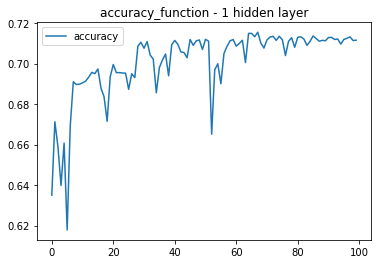

In [19]:
# Plot the train and test loss function
import matplotlib.pyplot as plt
plt.plot(fit_model.history["accuracy"])
plt.title("accuracy_function - 1 hidden layer")
plt.legend(["accuracy"])
plt.show()

### 2nd trial with Additional neurons and hidden layers

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                492       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model2 = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 713us/step - loss: 0.6681 - accuracy: 0.6438
Epoch 2/100
804/804 [==============================] - 1s 775us/step - loss: 0.5774 - accuracy: 0.7164
Epoch 3/100
804/804 [==============================] - 1s 758us/step - loss: 0.5634 - accuracy: 0.7264
Epoch 4/100
804/804 [==============================] - 1s 765us/step - loss: 0.5580 - accuracy: 0.7268
Epoch 5/100
740/804 [==========================>...] - ETA: 0s - loss: 0.5553 - accuracy: 0.7278
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
804/804 [==============================] - 1s 777us/step - loss: 0.5555 - accuracy: 0.7278
Epoch 6/100
804/804 [==============================] - 1s 768us/step - loss: 0.5562 - accuracy: 0.7281
Epoch 7/100
804/804 [==============================] - 1s 751us/step - loss: 0.5593 - accuracy: 0.7234
Epoch 8/100
804/804 [==============================] - 1s 748us/step - loss: 0.5538 - accuracy: 0.7284
Epoch 9/100
804/804 [============

804/804 [==============================] - 1s 797us/step - loss: 0.5452 - accuracy: 0.7323
Epoch 64/100
804/804 [==============================] - 1s 750us/step - loss: 0.5464 - accuracy: 0.7353
Epoch 65/100
531/804 [==================>...........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7390
Epoch 00065: saving model to checkpoints2\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5419 - accuracy: 0.7372
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5408 - accuracy: 0.7391
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5418 - accuracy: 0.7369
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.7361
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7335
Epoch 70/100
495/804 [=================>............] - ETA: 0s - loss: 0.5319 - accuracy: 0.7425
Epoch 00070: saving model to checkpoints2\weights.70.h

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5534 - accuracy: 0.7364
Loss: 0.5533517003059387, Accuracy: 0.7364431619644165


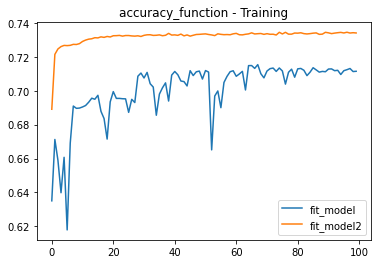

In [24]:
plt.plot(fit_model.history["accuracy"])
plt.plot(fit_model2.history["accuracy"])
plt.title("accuracy_function - Training")
plt.legend(["fit_model", "fit_model2"])
plt.show()

### 3rd trial with Additional hidden layers and different activation fuction 

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="linear"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                492       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 595
Trainable params: 595
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model3 = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 734us/step - loss: 0.6543 - accuracy: 0.6302
Epoch 2/100
804/804 [==============================] - 1s 843us/step - loss: 0.5753 - accuracy: 0.7205
Epoch 3/100
804/804 [==============================] - 1s 817us/step - loss: 0.5658 - accuracy: 0.7227
Epoch 4/100
804/804 [==============================] - 1s 800us/step - loss: 0.5625 - accuracy: 0.7264
Epoch 5/100
763/804 [===========================>..] - ETA: 0s - loss: 0.5611 - accuracy: 0.7256
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
804/804 [==============================] - 1s 826us/step - loss: 0.5609 - accuracy: 0.7257
Epoch 6/100
804/804 [==============================] - 1s 842us/step - loss: 0.5538 - accuracy: 0.7319
Epoch 7/100
804/804 [==============================] - 1s 822us/step - loss: 0.5574 - accuracy: 0.7312
Epoch 8/100
804/804 [==============================] - 1s 800us/step - loss: 0.5576 - accuracy: 0.7262
Epoch 9/100
804/804 [============

804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7332
Epoch 64/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7286
Epoch 65/100
527/804 [==================>...........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7416
Epoch 00065: saving model to checkpoints3\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7393
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7330
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5466 - accuracy: 0.7332
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5430 - accuracy: 0.7388
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5445 - accuracy: 0.7365
Epoch 70/100
489/804 [=================>............] - ETA: 0s - loss: 0.5402 - accuracy: 0.7407
Epoch 00070: saving model to checkpoints3\weights.70.hdf5


In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5526 - accuracy: 0.7341
Loss: 0.5526117086410522, Accuracy: 0.7341107726097107


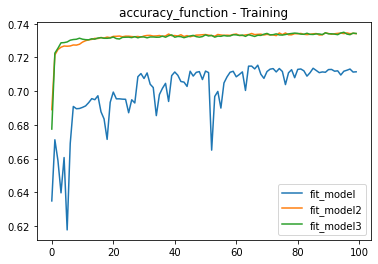

In [29]:
plt.plot(fit_model.history["accuracy"])
plt.plot(fit_model2.history["accuracy"])
plt.plot(fit_model3.history["accuracy"])
plt.title("accuracy_function - Training")
plt.legend(["fit_model", "fit_model2", "fit_model3"])
plt.show()

### 4th trial with Data Preprocessing

In [30]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [31]:
# Get the descriptive statistics for ASK_AMT using .describe()
application_askATM_df = application_df["ASK_AMT"]
application_askATM_df.describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [32]:
# Data Preprocessing
# Establish the ASK_AMT bins and group names.
ASK_AMT_bins = [0, 5e+03, 1e+04, 5e+04, 1e+05, 5e+05, 1e+06, 5e+06, 1e+07, 5e+07, 1e+10]
application_askATM_df.groupby(pd.cut(application_askATM_df, ASK_AMT_bins)).count()


ASK_AMT
(0.0, 5000.0]                  25398
(5000.0, 10000.0]                549
(10000.0, 50000.0]              2398
(50000.0, 100000.0]             1423
(100000.0, 500000.0]            2304
(500000.0, 1000000.0]            650
(1000000.0, 5000000.0]           940
(5000000.0, 10000000.0]          225
(10000000.0, 50000000.0]         258
(50000000.0, 10000000000.0]      154
Name: ASK_AMT, dtype: int64

In [33]:
# Creat the ASK_AMT bins
group_names = ["0-5e+03", "5001-1e+04", "10001-5e+04", "50001-5e+05", "100001-5e+05","500001-1e+06", "1000001-5e+06", "5000001-1e+07", "10000001-5e+07",  ">=5000001" ]
# Categorize spending based on the ASK_AMT bins.
application_df["ASK_AMT_Ranges"] = pd.cut(application_askATM_df, ASK_AMT_bins, labels=group_names)
# Drop 'ASK_AMT' column
application_df = application_df.drop(["ASK_AMT"],1)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_Ranges
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,1,0-5e+03
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,100001-5e+05
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,0-5e+03
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5001-1e+04
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,100001-5e+05


In [34]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_Ranges
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,0-5e+03
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,100001-5e+05
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,0-5e+03
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5001-1e+04
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,100001-5e+05


In [35]:
application_df['ASK_AMT_Ranges'] = application_df['ASK_AMT_Ranges'].astype('str')
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
ASK_AMT_Ranges            object
dtype: object

In [36]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_AMT_Ranges            10
dtype: int64

In [37]:
# Look at APPLICATION_TYPE value counts for binning
applType_count=application_df.APPLICATION_TYPE.value_counts()
applType_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [38]:
# Determine which values to replace if counts are less than ...?
replace_application = list(applType_count[applType_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [39]:
# Look at CLASSIFICATION value counts for binning
classific_count=application_df.CLASSIFICATION.value_counts()
classific_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C2561        1
C6100        1
C2500        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [40]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classific_count[classific_count < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [41]:
# Look at CLASSIFICATION value counts for binning
ASK_AMT_Ranges_count=application_df.ASK_AMT_Ranges.value_counts()
ASK_AMT_Ranges_count

0-5e+03           25398
10001-5e+04        2398
100001-5e+05       2304
50001-5e+05        1423
1000001-5e+06       940
500001-1e+06        650
5001-1e+04          549
10000001-5e+07      258
5000001-1e+07       225
>=5000001           154
Name: ASK_AMT_Ranges, dtype: int64

In [42]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE           9
AFFILIATION                6
CLASSIFICATION             8
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_AMT_Ranges            10
dtype: int64

In [43]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ASK_AMT_Ranges_0-5e+03,ASK_AMT_Ranges_10000001-5e+07,ASK_AMT_Ranges_1000001-5e+06,ASK_AMT_Ranges_100001-5e+05,ASK_AMT_Ranges_10001-5e+04,ASK_AMT_Ranges_5000001-1e+07,ASK_AMT_Ranges_500001-1e+06,ASK_AMT_Ranges_50001-5e+05,ASK_AMT_Ranges_5001-1e+04,ASK_AMT_Ranges_>=5000001
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ASK_AMT_Ranges_0-5e+03,ASK_AMT_Ranges_10000001-5e+07,ASK_AMT_Ranges_1000001-5e+06,ASK_AMT_Ranges_100001-5e+05,ASK_AMT_Ranges_10001-5e+04,ASK_AMT_Ranges_5000001-1e+07,ASK_AMT_Ranges_500001-1e+06,ASK_AMT_Ranges_50001-5e+05,ASK_AMT_Ranges_5001-1e+04,ASK_AMT_Ranges_>=5000001
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                660       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 745
Trainable params: 745
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints4/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model4 = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])



Epoch 1/100
804/804 [==============================] - 1s 780us/step - loss: 0.6957 - accuracy: 0.6335
Epoch 2/100
804/804 [==============================] - 1s 836us/step - loss: 0.5810 - accuracy: 0.7218
Epoch 3/100
804/804 [==============================] - 1s 867us/step - loss: 0.5648 - accuracy: 0.7245
Epoch 4/100
804/804 [==============================] - 1s 838us/step - loss: 0.5551 - accuracy: 0.7266
Epoch 5/100
735/804 [==========================>...] - ETA: 0s - loss: 0.5493 - accuracy: 0.7313
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
804/804 [==============================] - 1s 855us/step - loss: 0.5497 - accuracy: 0.7310
Epoch 6/100
804/804 [==============================] - 1s 868us/step - loss: 0.5465 - accuracy: 0.7344
Epoch 7/100
804/804 [==============================] - 1s 831us/step - loss: 0.5500 - accuracy: 0.7291
Epoch 8/100
804/804 [==============================] - 1s 820us/step - loss: 0.5435 - accuracy: 0.7335
Epoch 9/100
804/804 [============

804/804 [==============================] - 1s 799us/step - loss: 0.5393 - accuracy: 0.7340
Epoch 64/100
804/804 [==============================] - 1s 850us/step - loss: 0.5373 - accuracy: 0.7373
Epoch 65/100
521/804 [==================>...........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7404
Epoch 00065: saving model to checkpoints4\weights.65.hdf5
804/804 [==============================] - 1s 816us/step - loss: 0.5351 - accuracy: 0.7392
Epoch 66/100
804/804 [==============================] - 1s 784us/step - loss: 0.5356 - accuracy: 0.7366
Epoch 67/100
804/804 [==============================] - 1s 780us/step - loss: 0.5386 - accuracy: 0.7362
Epoch 68/100
804/804 [==============================] - 1s 784us/step - loss: 0.5372 - accuracy: 0.7369
Epoch 69/100
804/804 [==============================] - 1s 768us/step - loss: 0.5379 - accuracy: 0.73920s - loss: 0.539
Epoch 70/100
522/804 [==================>...........] - ETA: 0s - loss: 0.5343 - accuracy: 0.7388
Epoch 00070: saving model to

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5520 - accuracy: 0.7332
Loss: 0.5519724488258362, Accuracy: 0.7331778407096863


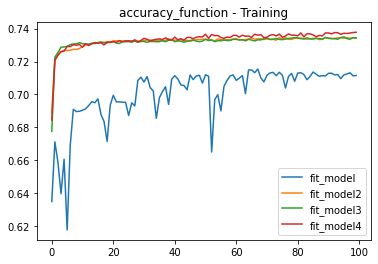

In [49]:
plt.plot(fit_model.history["accuracy"])
plt.plot(fit_model2.history["accuracy"])
plt.plot(fit_model3.history["accuracy"])
plt.plot(fit_model4.history["accuracy"])
plt.title("accuracy_function - Training")
plt.legend(["fit_model", "fit_model2", "fit_model3", "fit_model4"])
plt.show()

### 5th trial with Data Preprocessing

In [50]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [51]:
application_df.count()

EIN                       34299
NAME                      34299
APPLICATION_TYPE          34299
AFFILIATION               34299
CLASSIFICATION            34299
USE_CASE                  34299
ORGANIZATION              34299
STATUS                    34299
INCOME_AMT                34299
SPECIAL_CONSIDERATIONS    34299
ASK_AMT                   34299
IS_SUCCESSFUL             34299
dtype: int64

In [52]:
# Data Preprocessing
# Establish the ASK_AMT bins and group names.
ASK_AMT_bins = [0, 5e+03, 1e+04, 5e+04, 1e+05, 5e+05, 1e+06, 5e+06, 1e+07, 5e+07, 1e+10]
application_askATM_df.groupby(pd.cut(application_askATM_df, ASK_AMT_bins)).count()

# Creat the ASK_AMT bins
group_names = ["0-5e+03", "5001-1e+04", "10001-5e+04", "50001-5e+05", "100001-5e+05","500001-1e+06", "1000001-5e+06", "5000001-1e+07", "10000001-5e+07",  ">=5000001" ]
# Categorize spending based on the ASK_AMT bins.
application_df["ASK_AMT_Ranges"] = pd.cut(application_askATM_df, ASK_AMT_bins, labels=group_names)
# Drop 'ASK_AMT' column
application_df = application_df.drop(["ASK_AMT"],1)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_Ranges
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,1,0-5e+03
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,100001-5e+05
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,0-5e+03
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5001-1e+04
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,100001-5e+05


In [53]:
application_df['ASK_AMT_Ranges'] = application_df['ASK_AMT_Ranges'].astype('str')
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
IS_SUCCESSFUL              int64
ASK_AMT_Ranges            object
dtype: object

In [54]:
APPLICATION_TYPE_count=application_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [55]:
# Determine which values to replace if counts are less than ...?
replace_application = list(applType_count[applType_count < 100 ].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [56]:
CLASSIFICATION_count=application_df.CLASSIFICATION.value_counts()
CLASSIFICATION_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2170        1
C2561        1
C6100        1
C2500        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [57]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classific_count[classific_count < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [58]:
AFFILIATION_count=application_df.AFFILIATION.value_counts()
AFFILIATION_count

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [59]:
# Determine which values to replace if counts are less than ..?
replace_AFFILIATION = list(AFFILIATION_count[AFFILIATION_count < 100].index)

# Replace in dataframe
for aff in replace_AFFILIATION :
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [60]:
USE_CASE_count=application_df.USE_CASE.value_counts()
USE_CASE_count

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [61]:
ORGANIZATION_count=application_df.ORGANIZATION.value_counts()
ORGANIZATION_count

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [62]:
INCOME_AMT_count=application_df.INCOME_AMT.value_counts()
INCOME_AMT_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [63]:
ASK_AMT_Ranges_count=application_df.ASK_AMT_Ranges.value_counts()
ASK_AMT_Ranges_count

0-5e+03           25398
10001-5e+04        2398
100001-5e+05       2304
50001-5e+05        1423
1000001-5e+06       940
500001-1e+06        650
5001-1e+04          549
10000001-5e+07      258
5000001-1e+07       225
>=5000001           154
Name: ASK_AMT_Ranges, dtype: int64

In [64]:
SPECIAL_CONSIDERATIONS_count=application_df.SPECIAL_CONSIDERATIONS.value_counts()
SPECIAL_CONSIDERATIONS_count

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [65]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
# Drop the non-beneficial ID columns, 'SPECIAL_CONSIDERATIONS'.
application_df = application_df.drop(["SPECIAL_CONSIDERATIONS"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,IS_SUCCESSFUL,ASK_AMT_Ranges
0,T10,Independent,C1000,ProductDev,Association,1,0,1,0-5e+03
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,1,100001-5e+05
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0,0-5e+03
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,1,5001-1e+04
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,1,100001-5e+05


In [66]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# Determine the number of unique values in each column.
application_df[application_cat].nunique()

APPLICATION_TYPE    10
AFFILIATION          3
CLASSIFICATION      12
USE_CASE             5
ORGANIZATION         4
INCOME_AMT           9
ASK_AMT_Ranges      10
dtype: int64

In [67]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ASK_AMT_Ranges_0-5e+03,ASK_AMT_Ranges_10000001-5e+07,ASK_AMT_Ranges_1000001-5e+06,ASK_AMT_Ranges_100001-5e+05,ASK_AMT_Ranges_10001-5e+04,ASK_AMT_Ranges_5000001-1e+07,ASK_AMT_Ranges_500001-1e+06,ASK_AMT_Ranges_50001-5e+05,ASK_AMT_Ranges_5001-1e+04,ASK_AMT_Ranges_>=5000001
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [69]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                660       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 745
Trainable params: 745
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints5/",exist_ok=True)
checkpoint_path = "checkpoints5/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model5 = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])



Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.6637 - accuracy: 0.6106
Epoch 2/100
804/804 [==============================] - 1s 897us/step - loss: 0.5679 - accuracy: 0.7186
Epoch 3/100
804/804 [==============================] - 1s 834us/step - loss: 0.5615 - accuracy: 0.7179
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5568 - accuracy: 0.7204
Epoch 5/100
771/804 [===========================>..] - ETA: 0s - loss: 0.5515 - accuracy: 0.7295
Epoch 00005: saving model to checkpoints5\weights.05.hdf5
804/804 [==============================] - 1s 940us/step - loss: 0.5514 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 1s 817us/step - loss: 0.5466 - accuracy: 0.7322
Epoch 7/100
804/804 [==============================] - 1s 883us/step - loss: 0.5451 - accuracy: 0.7287
Epoch 8/100
804/804 [==============================] - 1s 831us/step - loss: 0.5486 - accuracy: 0.7243
Epoch 9/100
804/804 [================

804/804 [==============================] - 1s 871us/step - loss: 0.5348 - accuracy: 0.7408
Epoch 65/100
538/804 [===================>..........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7417
Epoch 00065: saving model to checkpoints5\weights.65.hdf5
804/804 [==============================] - 1s 852us/step - loss: 0.5351 - accuracy: 0.7393
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7324
Epoch 67/100
804/804 [==============================] - 1s 866us/step - loss: 0.5391 - accuracy: 0.7356
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5422 - accuracy: 0.7342
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7355
Epoch 70/100
509/804 [=================>............] - ETA: 0s - loss: 0.5352 - accuracy: 0.7372
Epoch 00070: saving model to checkpoints5\weights.70.hdf5
804/804 [==============================] - 1s 825us/step - loss: 0.5373 - accuracy: 0.7361
Epoch

In [71]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5427 - accuracy: 0.7340
Loss: 0.5426656603813171, Accuracy: 0.73399418592453


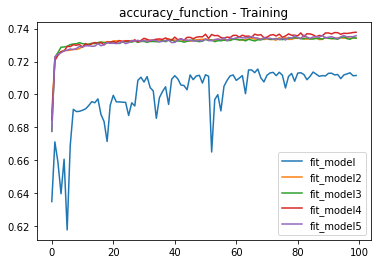

In [72]:
plt.plot(fit_model.history["accuracy"])
plt.plot(fit_model2.history["accuracy"])
plt.plot(fit_model3.history["accuracy"])
plt.plot(fit_model4.history["accuracy"])
plt.plot(fit_model5.history["accuracy"])
plt.title("accuracy_function - Training")
plt.legend(["fit_model", "fit_model2", "fit_model3", "fit_model4", "fit_model5"])
plt.show()